# Data Visualisation and converting to Laplacian matrix for Graph Neural Networks #

In this notebook we visual the data set.The dataset consists of Indian Patients both male and female(as written in summary) who's meditation and thinking eeg signals are recorded.We use mne module to visualise and understand the given dataset.
The dataset is downloaded by the command "pip install openneuro-py" it consists of 98 patients.
All the files are in bdf format BioSemiDataFormat. The files are arranged according to Bids or Brain Imaging Data Format


# Modules and Import #
Run the commented segments if running first time,the matplotlib import is to remove DLL import errors

In [7]:
#Run the following command in a python environment to download the dataset
#pip install openneuro-py
#openneuro-py download --dataset=ds003969 
# !pip install mne
# !pip install mne-bids
# !pip install openneuro-py
# !pip uninstall matplotlib
# !pip install matplotlib==3.0.3
import mne
import os
import matplotlib.pyplot as plt
from mne_bids import (BIDSPath, read_raw_bids,print_dir_tree, make_report, update_sidecar_json)

# The file structure #

In [8]:
os.chdir('C:/Users/josep/Desktop/dataser/ds003969')
bids_root=os.getcwd()
##prints the dir tree 
print_dir_tree(bids_root,max_depth=3)


|ds003969\
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-002_task-med1breath_eeg.fif
|--- code\
|------ prepare_for_bids.m
|--- sourcedata\
|------ CTR-2.xls
|------ CTR.xls
|------ HT.xls
|------ Medeq.xls
|------ README.txt
|------ SNY-2.ods
|------ SNY.xls
|------ TM.xls
|------ VIP-2.xls
|------ VIP.xls
|--- sub-001\
|------ eeg\
|--------- sub-001_task-med1breath_channels.tsv
|--------- sub-001_task-med1breath_eeg.bdf
|--------- sub-001_task-med1breath_eeg.json
|--------- sub-001_task-med2_channels.tsv
|--------- sub-001_task-med2_eeg.bdf
|--------- sub-001_task-med2_eeg.json
|--------- sub-001_task-think1_channels.tsv
|--------- sub-001_task-think1_eeg.bdf
|--------- sub-001_task-think1_eeg.json
|--------- sub-001_task-think2_channels.tsv
|--------- sub-001_task-think2_eeg.bdf
|--------- sub-001_task-think2_eeg.json
|--- sub-002\
|------ eeg\
|--------- sub-002_task-med1breath_channels.tsv
|--------- sub-002_task-med1

# Selecting One Patient to Visualise #

In [9]:
##data type is eeg signals the subject is patient 2 the task performed by subject is simple breathing 
##the BIDSPath is used to initialise
##the pattern is inputted and the file is matched and outputted
datatype='eeg'
subject='002'
task='med1breath'
suffix='eeg'
bids_path=BIDSPath(subject=subject,task=task,suffix=suffix,datatype=datatype,root=bids_root)
sidecar_path=bids_path.copy().update(extension='.json')
print(bids_path.match())
                               

[BIDSPath(
root: C:/Users/josep/Desktop/dataser/ds003969
datatype: eeg
basename: sub-002_task-med1breath_eeg.bdf)]


In [10]:
##bids report the warning is because no scan.tsv is found refer https://sapienlabs.org/lab-talk/the-bids-data-structure-for-eeg/
print(make_report(bids_root))

Summarizing participants.tsv C:\Users\josep\Desktop\dataser\ds003969\participants.tsv...
The participant template found: comprised of 72 male and 26 female participants;
handedness were all unknown;
ages ranged from 22.0 to 74.0 (mean = 43.92, std = 13.65; 1 with unknown age)
 The Meditation vs thinking task dataset was created by Arnaud Delorme, and
Claire Braboszcz and conforms to BIDS version v1.2.1. This report was generated
with MNE-BIDS (https://doi.org/10.21105/joss.01896). The dataset consists of 32
participants (comprised of 72 male and 26 female participants; handedness were
all unknown; ages ranged from 22.0 to 74.0 (mean = 43.92, std = 13.65; 1 with
unknown age)) .


C:\Users\josep\AppData\Local\Temp\ipykernel_1512\2875037554.py:2: RuntimeWarning: No *scans.tsv files found. Currently, we do not generate a report without the scans.tsv files.
  print(make_report(bids_root))


In [11]:
##raw is used to store raw data 
raw = read_raw_bids(bids_path=bids_path)

Extracting EDF parameters from C:\Users\josep\Desktop\dataser\ds003969\sub-002\eeg\sub-002_task-med1breath_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading channel info from C:\Users\josep\Desktop\dataser\ds003969\sub-002\eeg\sub-002_task-med1breath_channels.tsv.


C:\Users\josep\AppData\Local\Temp\ipykernel_1512\3624230375.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = read_raw_bids(bids_path=bids_path)
C:\Users\josep\AppData\Local\Temp\ipykernel_1512\3624230375.py:2: RuntimeWarning: Did not find any events.tsv associated with sub-002_task-med1breath.

The search_str was "C:\Users\josep\Desktop\dataser\ds003969\sub-002\**\eeg\sub-002*events.tsv"
  raw = read_raw_bids(bids_path=bids_path)
C:\Users\josep\AppData\Local\Temp\ipykernel_1512\3624230375.py:2: RuntimeWarning: The number of channels in the channels.tsv sidecar file (79) does not match the number of channels in the raw data file (80). Will not try to set channel names.
  raw = read_raw_bids(bids_path=bids_path)
C:\Users\josep\AppData\Local\Temp\ipykernel_1512\3624230375.py:2: RuntimeWarning: The unit for channel(s) GSR1, GSR2 has changed from V to S.
  raw = 

In [12]:
##information contained

print(raw)
raw.info
raw.set_eeg_reference('average', projection=True) 

<RawEDF | sub-002_task-med1breath_eeg.bdf, 80 x 28672 (28.0 s), ~81 kB, data not loaded>
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated


<RawEDF | sub-002_task-med1breath_eeg.bdf, 80 x 28672 (28.0 s), ~84 kB, data not loaded>

In [13]:
##line freq and subject information

print(raw.info['line_freq'])
print(raw.info['subject_info'])

50.0
{'his_id': 'sub-002', 'gender': 'f', 'age': '62', 'group': 'htr', 'ethnicity': 'caucasian', 'first_session': 'thinking', 'sleep': '7', 'education': '6', 'years_of_practice': '31'}


Using matplotlib as 2D backend.


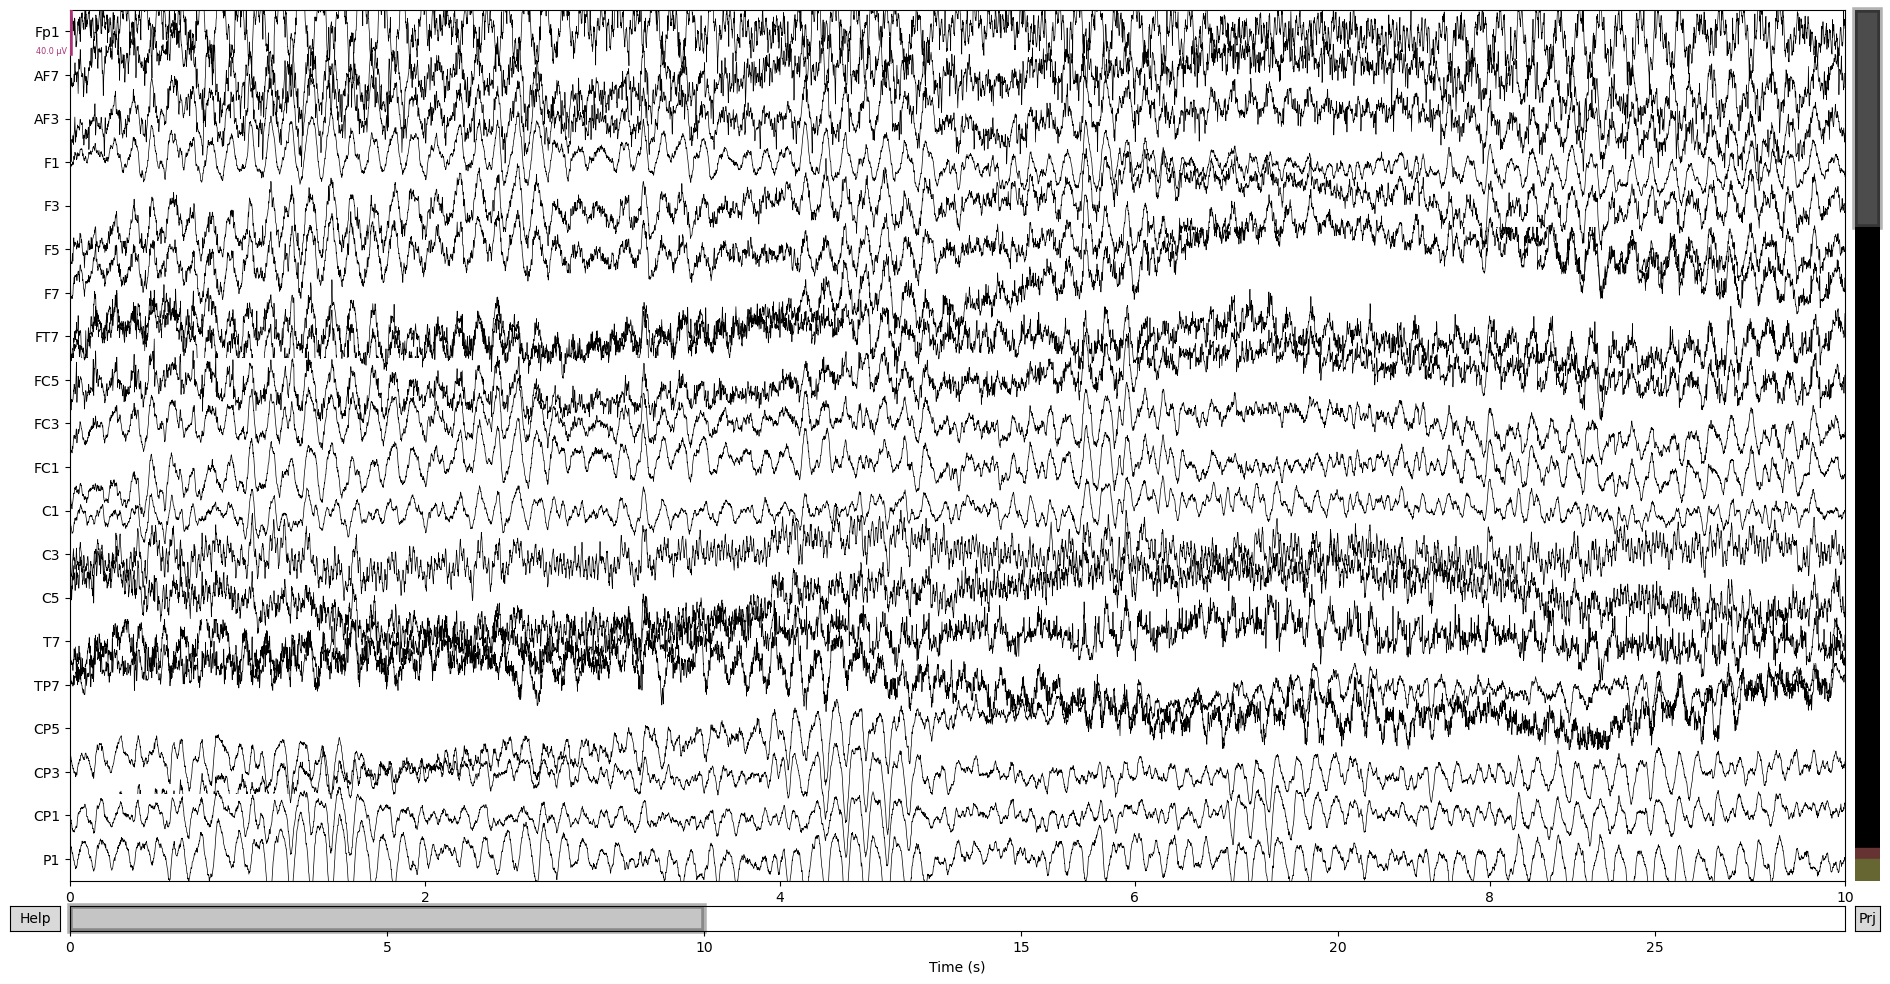

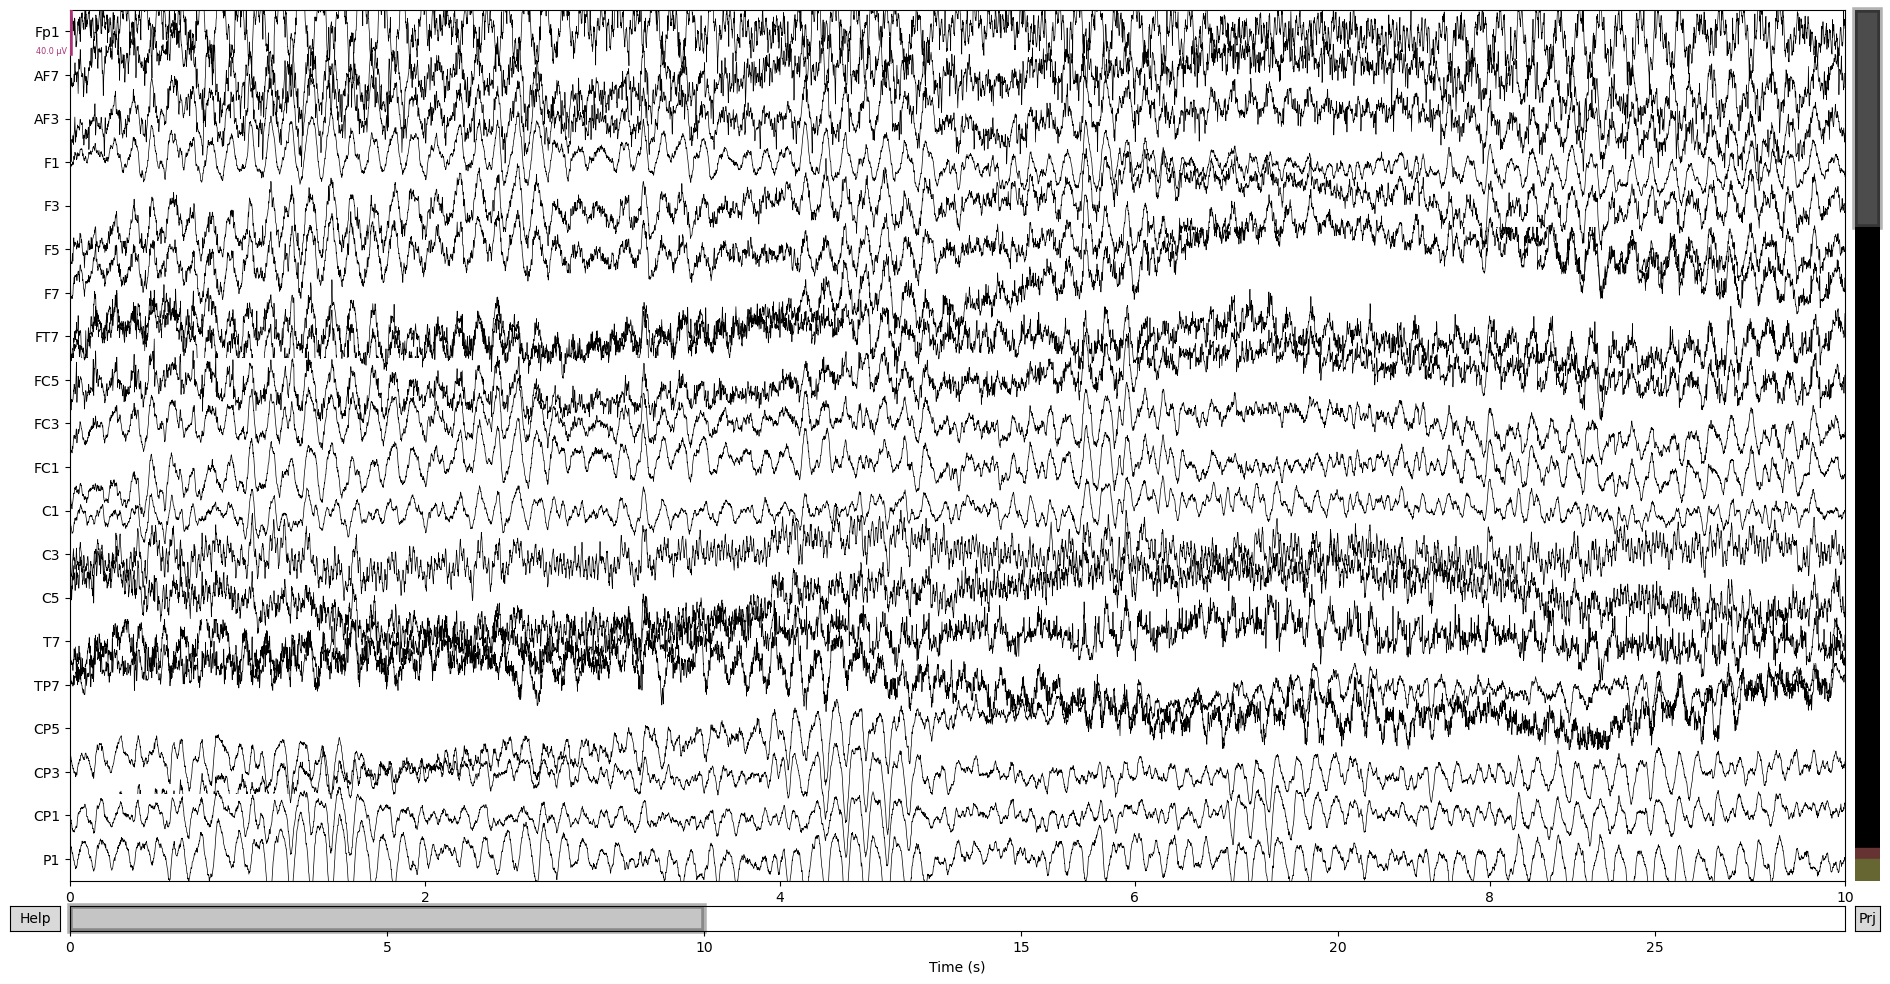

In [14]:
%matplotlib inline
##plotted channels vs frequency of sub-002
import matplotlib.pyplot as plt

raw.plot()

# Loading the data and passing it through a bandpass filter #
Note the l_freq=8 and the h_freq=40 for this dataset was taken,and the sampling frequency of 1024 for this dataset

In [15]:
raw.load_data()
raw.filter(l_freq=8, h_freq=40)

Reading 0 ... 28671  =      0.000 ...    27.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


<RawEDF | sub-002_task-med1breath_eeg.bdf, 80 x 28672 (28.0 s), ~17.6 MB, data loaded>

# Creation of a fif file from the bids file and setting eeg_reference #
Once the eeg_signals have been set and after setting the EEG references we creating a standard montage of 10/20 and picking all the EEG channels( note no preprocessing was done as all channels were marked as good in the dataset,dataset was preprocessed beforehand) , after choosing the 10/20 montage we setting the montage to the raw file 

EEG channel type selected for re-referencing


C:\Users\josep\AppData\Local\Temp\ipykernel_1512\1093667018.py:2: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average',projection=True)


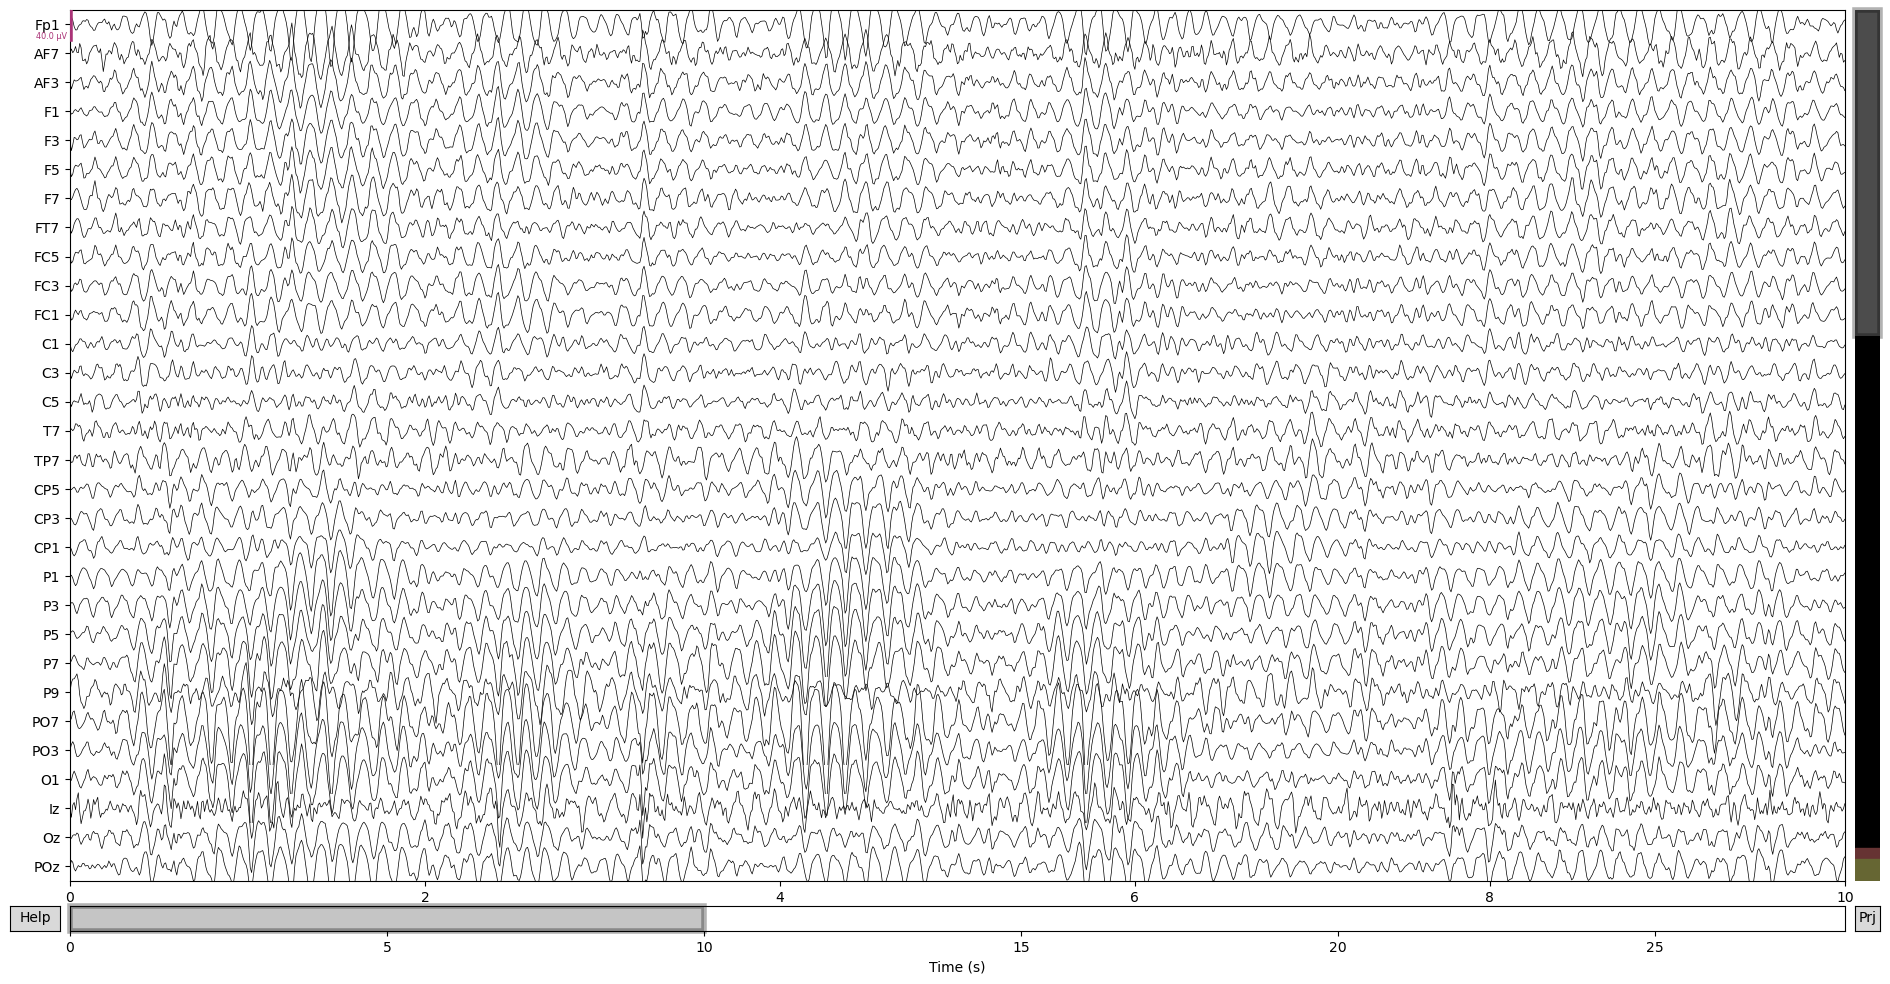

Overwriting existing file.
Writing C:\Users\josep\Desktop\dataser\ds003969\sub-002_task-med1breath_eeg.fif
Closing C:\Users\josep\Desktop\dataser\ds003969\sub-002_task-med1breath_eeg.fif
[done]


In [16]:
#Sets the reference to average using
raw.set_eeg_reference('average',projection=True)
raw.plot(duration=10,n_channels=30)
raw.save('sub-002_task-med1breath_eeg.fif',overwrite=True)

In [17]:
#Load the preprocessed and digitised EEG data
raw = mne.io.read_raw_fif('sub-002_task-med1breath_eeg.fif', preload=True)
#function is used to create a standard 10-20 montage
montage=mne.channels.make_standard_montage('standard_1020')
#used to select EEG channels for the laplacian matrix
picks=mne.pick_types(raw.info,meg=False,eeg=True)
print(montage)
print(picks)
raw.set_montage(montage)

Opening raw data file sub-002_task-med1breath_eeg.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 28671 =      0.000 ...    27.999 secs
Ready.
Reading 0 ... 28671  =      0.000 ...    27.999 secs...
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


<Raw | sub-002_task-med1breath_eeg.fif, 80 x 28672 (28.0 s), ~17.6 MB, data loaded>

# Creation of a the laplacian matrix#


In [18]:
#Create the Laplacian Matrix
csd = mne.preprocessing.compute_current_source_density(raw, sphere='auto', lambda2=1e-05, stiffness=4, n_legendre_terms=50, copy=True)
print(csd)

Fitted sphere radius:         96.2 mm
Origin head coordinates:      -0.8 14.4 43.1 mm
Origin device coordinates:    -0.8 14.4 43.1 mm
<Raw | sub-002_task-med1breath_eeg.fif, 80 x 28672 (28.0 s), ~17.6 MB, data loaded>


# Creation of the Graph Object for input to the Graph Neural Network#
This graph Object created from the Laplacian matrix is passed into the graph neural network.This was created using the networkx library.The input variable is given by the var 'G'
documentation is given below:
https://networkx.org/documentation/stable/tutorial.html

In [19]:
##!pip install networkx


This code computes the functional connectivity based on the CS

D (current source density) data.

The first step is to load the CSD data using csd.get_data().

The CSD data is then divided into blocks of size block_size, which is defined as 500 in this case. For each block, the code computes the correlation matrix using np.corrcoef(). Any NaN values in the correlation matrix are replaced with 0. The resulting correlation matrix for each block is then appended to a list corr_blocks.

Before combining the correlation matrices, the code ensures that all matrices have the same number of columns by zero-padding the matrices with fewer columns than the maximum number of columns. Then, the code ensures that all matrices have the same number of rows by zero-padding the matrices with fewer rows than the maximum number of rows. This is done using np.pad().

The zero-padded correlation matrices are then combined using np.block() to form a single correlation matrix corr.

Finally, the correlation matrix is converted to a sparse matrix using csr_matrix() from scipy.sparse and then to a NetworkX graph using 

In [20]:
import numpy as np
!pip install networkx==3.0
import networkx as nx

# Load CSD data
csd_data = csd.get_data()

# Define block size
block_size = 1024

# Compute correlation matrix for each block
corr_blocks = []
max_cols = 0
for i in range(0, csd_data.shape[1], block_size):
    block_data = csd_data[:, i:i+block_size]
    corr_block = np.corrcoef(block_data, rowvar=False)
    corr_block[np.isnan(corr_block)] = 0
    corr_blocks.append(corr_block)
    max_cols = max(max_cols, corr_block.shape[1])

# Zero-pad correlation matrices to ensure same number of columns
for i in range(len(corr_blocks)):
    corr_block = corr_blocks[i]
    num_cols = corr_block.shape[1]
    if num_cols < max_cols:
        pad_cols = max_cols - num_cols
        corr_blocks[i] = np.pad(corr_block, ((0, 0), (0, pad_cols)), mode='constant')

# Zero-pad correlation matrices to ensure same number of rows
max_rows = max([cb.shape[0] for cb in corr_blocks])
for i in range(len(corr_blocks)):
    corr_block = corr_blocks[i]
    num_rows = corr_block.shape[0]
    if num_rows < max_rows:
        pad_rows = max_rows - num_rows
        corr_blocks[i] = np.pad(corr_block, ((0, pad_rows), (0, 0)), mode='constant')

# Combine correlation matrices using np.block
corr = np.block(corr_blocks)





In [21]:
print(corr)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.15635864 0.15636324 0.15636462 ... 1.         1.         1.        ]
 [0.15635862 0.15636322 0.15636461 ... 1.         1.         1.        ]
 [0.1563586  0.1563632  0.15636459 ... 1.         1.         1.        ]]


In [22]:
# Convert correlation matrix to sparse matrix
from scipy import sparse 

corr_sparse=scipy.sparse.csr_matrix(corr)
print(corr_sparse)
print(corr_sparse.shape)

  (0, 0)	1.0
  (0, 1)	0.9999999999891453
  (0, 2)	0.9999999999816087
  (0, 3)	0.9999999999815252
  (0, 4)	0.9999999999814301
  (0, 5)	0.9999999999813322
  (0, 6)	0.9999999999812406
  (0, 7)	0.9999999999811631
  (0, 8)	0.9999999999811051
  (0, 9)	0.9999999999810693
  (0, 10)	0.9999999999810556
  (0, 11)	0.9999999999810616
  (0, 12)	0.9999999999810821
  (0, 13)	0.999999999981112
  (0, 14)	0.9999999999811451
  (0, 15)	0.9999999999811761
  (0, 16)	0.9999999999812004
  (0, 17)	0.9999999999812158
  (0, 18)	0.9999999999812202
  (0, 19)	0.9999999999812136
  (0, 20)	0.9999999999811965
  (0, 21)	0.9999999999811707
  (0, 22)	0.9999999999811372
  (0, 23)	0.9999999999810986
  (0, 24)	0.999999999981057
  :	:
  (1023, 28647)	0.9999999999692869
  (1023, 28648)	0.999999999969045
  (1023, 28649)	0.999999999968942
  (1023, 28650)	0.999999999969037
  (1023, 28651)	0.9999999999693724
  (1023, 28652)	0.9999999999699715
  (1023, 28653)	0.9999999999708304
  (1023, 28654)	0.9999999999719216
  (1023, 28655)	0.9

In [23]:
#!pip install --upgrade networkx
import networkx as nx
# Convert sparse matrix to NetworkX graph
G=nx.Graph()

In [25]:
#this might take a while to run
#converting the the Sparse matrix into graph
from scipy import sparse 
rows, cols, values = sparse.find(corr_sparse)
edges = [(i, j, values[k]) for k, (i, j) in enumerate(zip(rows, cols))]
G.add_weighted_edges_from(edges)


In [ ]:
#plotting the graph
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your networkx graph object with weighted edges
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()
